Perceptron (Single layer Fully connected NN): Simplest ANN based on Threshold Logic Unit. All the inputs are weighted. The Perceptron computes the weighted sum of all the inputs and pass the output to a step function to make decision. 

**Simpleste Step Function is: Heaviside Step Function**

Look the below figure for the context. The below figure produces a logical ouptut between 1 or 0.

<img src='ann.png'>

<img src='heaviside.png'>

<img src="gd_percp.png">

The decision boundary of each output neuron is linear, so Perceptrons are incapable
of learning complex patterns (just like Logistic Regression classifiers).


In fact, Scikit-Learn’s Perceptron class is equivalent
to using an SGDClassifier with the following hyperparameters: loss="perceptron" ,
learning_rate="constant" , eta0=1 (the learning rate), and penalty=None (no regu‐
larization).

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# W
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

# Logistic REgression Loss

<img src="log_reg_loss.png">

# BackPropagation

#Using Foor loop
<img src="bp1_forloop.png">

#Without Foor loop Vectorization

np.dot($w, x$)


# TRY NUMPY if possible in place of For Loop

<img src="vectorizatn.png">


if you initialize all
weights and biases to zero, then all neurons in a given layer will be
perfectly identical, and thus backpropagation will affect them in
exactly the same way, so they will remain identical. In other words,
despite having hundreds of neurons per layer, your model will act
as if it had only one neuron per layer: it won’t be too smart. If
instead you randomly initialize the weights, you break the symme‐
try and allow backpropagation to train a diverse team of neurons.

# ACtivation Function

Step Function is replaced by sigmoid because most of the region of the step function is flat or which produces constant value which makes gradient decent inefficient as it does not learn anything from the same value over and over again.


Sigmoid: Good for output in binary classification problems.

Tanh:
Continous and Differentiable.
Useful in the middle layers.Value ranges from -1 to 1, tends to make the layers output more or less centered around 0 at the begining of the training which helps speed up the convergence. Mean is closer to 0 that helps the other layers.

Cons: If z is very high/low its derivative becomes very high/low which slows down the gradient decent.

ReLu: 

Continous and non-Differentiable at z=0. derivative is zero for z < 0. No max value. For most of the value of z, the derivative is > 0 and the NN learn faster.


# Non-Linear Activation Function
<img src="nonlin.png">

If we use Linear activation function, the nn is just producing the output as the linear function of the input. Therefore, it doesnot matter how many layers you have its not learning anything.


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

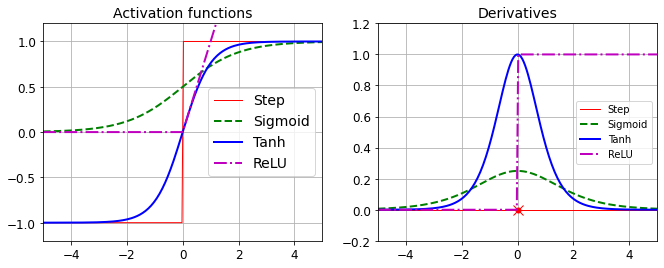

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=10)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# save_fig("activation_functions_plot")
plt.show()

# In general each positive class is dedicated to a output neuron

Deep neural networks are useful in learning complex things. Lower layers learn simple features and upper layer combining the simple features learn complex features. 

<img src="frwdbkprp.png">

One iteration of gradient decent

In [2]:
# Implementation with KERAS
from tensorflow import keras
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'



In [3]:
fashion_data = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_data.load_data()


# with Keras, data is an nd array with each example as an image instead of 1-D vector as we had before with Scikit-Learn



In [12]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [22]:
X_test = X_test / 255.

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

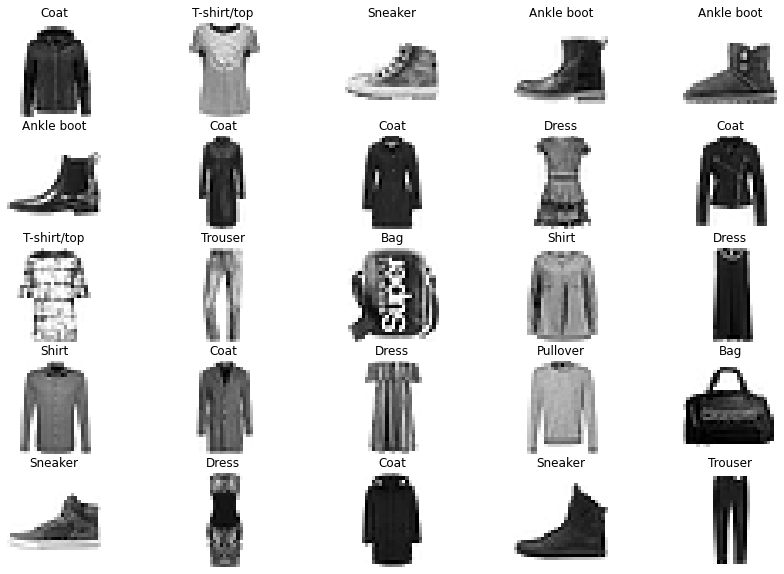

In [30]:
plt.figure(figsize=(15, 10))

for i in range(0, 25):
    plt.subplot(5,5, i+1)
    plt.axis('off')
    plt.grid(False)

    plt.imshow(X_train[i], cmap="binary", interpolation="nearest")
    plt.title(class_names[y_train[i]])
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.show()


In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# OR ........

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
#     ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [31]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [26]:
model.layers[0].name, model.get_layer('flatten')

('flatten', <tensorflow.python.keras.layers.core.Flatten at 0x7f14c827e700>)

In [7]:
hidden1 = model.layers[1]
# hidden1.name
weights, biases = hidden1.get_weights()

** initialize the weights and biases using other methods. check kernel_initializer and bias initializer **

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

For multiclass classification case, if each instance:

**Labeled with only class**: Sparse-cross-entropy

**Labelled with one-hot vector**: categorical crossentropy

If you want to convert sparse labels (i.e., class indices) to one-hot
vector labels, you can use the keras.utils.to_categorical()
function.

In [19]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5310 - val_accuracy: 0.7986
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4211 - accuracy: 0.8532 - val_loss: 0.3918 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4062 - accuracy: 0.8585 - val_loss: 0.3751 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 2s 955us/step - loss: 0.3755 - accuracy: 0.8674 - val_loss: 0.3706 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3655 - accuracy: 0.8715 - val_loss: 0.3624 - val_accurac

In [20]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

# Imbalanced classes

To deal with such cases, use class_weight arg when calling fit() method which gives larger weights to the underrepresented classes and lower weight to the overrepresented classes. 

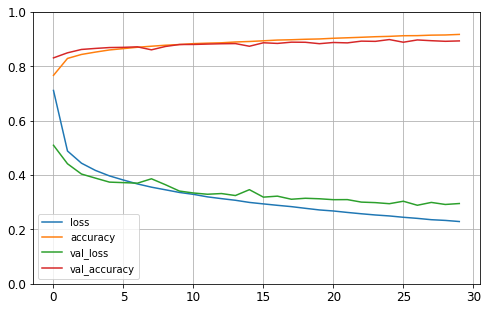

In [10]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 907us/step - loss: 0.3376 - accuracy: 0.8834


[0.33760565519332886, 0.883400022983551]

In [24]:
X_new = X_test[:6]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.12, 0.  , 0.02, 0.  , 0.01, 0.  , 0.86, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

# Regression using NN

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 732us/step - loss: 1.0336 - val_loss: 15.9921
Epoch 2/20
363/363 [==============================] - 0s 528us/step - loss: 1.0643 - val_loss: 9.6009
Epoch 3/20
363/363 [==============================] - 0s 550us/step - loss: 0.6049 - val_loss: 0.4534
Epoch 4/20
363/363 [==============================] - 0s 518us/step - loss: 0.4093 - val_loss: 0.3639
Epoch 5/20
363/363 [==============================] - 0s 532us/step - loss: 0.3959 - val_loss: 0.3605
Epoch 6/20
363/363 [==============================] - 0s 546us/step - loss: 0.3821 - val_loss: 0.3825
Epoch 7/20
363/363 [==============================] - 0s 522us/step - loss: 0.3962 - val_loss: 0.3767
Epoch 8/20
363/363 [==============================] - 0s 518us/step - loss: 0.3806 - val_loss: 0.3864
Epoch 9/20
363/363 [==============================] - 0s 528us/step - loss: 0.3660 - val_loss: 0.4068
Epoch 10/20
363/363 [==============================] - 0s 558us/step - loss: 0.37

The main differences are the fact that the output layer has a single neuron (since we only want to
predict a single value) and uses no activation function, and the loss function is the
mean squared error.

# Building Complex Models Using the Functional API

Sequential NN: Layers stacked one over the other.

Non-Sequential: It connects all or part of the inputs directly to the output layer, as shown in
Figure 10-13. This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path). In
contrast, a regular MLP forces all the data to flow through the full stack of layers, thus
simple patterns in the data may end up being distorted by this sequence of transfor‐
mations.

<img src="nonseq.png" alt="Wide and Deep NonSeq NN" style="width:200px;height:200px">

In [33]:
# non-Sequential network
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           270         input_7[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 30)           930         dense_23[0][0]                   
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 38)           0           input_7[0][0]                    
                                                                 dense_24[0][0]             

In [35]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 0s 771us/step - loss: 3.2566 - val_loss: 0.6913
Epoch 2/20
363/363 [==============================] - 0s 546us/step - loss: 0.6795 - val_loss: 0.9454
Epoch 3/20
363/363 [==============================] - 0s 538us/step - loss: 0.6284 - val_loss: 0.6622
Epoch 4/20
363/363 [==============================] - 0s 546us/step - loss: 0.5929 - val_loss: 0.5284
Epoch 5/20
363/363 [==============================] - 0s 566us/step - loss: 0.5452 - val_loss: 0.5004
Epoch 6/20
363/363 [==============================] - 0s 572us/step - loss: 0.5313 - val_loss: 0.5894
Epoch 7/20
363/363 [==============================] - 0s 572us/step - loss: 0.5207 - val_loss: 0.5889
Epoch 8/20
363/363 [==============================] - 0s 551us/step - loss: 0.4938 - val_loss: 0.4690
Epoch 9/20
363/363 [==============================] - 0s 617us/step - loss: 0.4789 - val_loss: 0.5305
Epoch 10/20
363/363 [==============================] - 0s 673us/step - loss: 0.472

In [36]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 393us/step - loss: 0.4164


In [37]:
y_pred

array([[0.4374305],
       [1.7257448],
       [3.4477878]], dtype=float32)

what if you want to send a subset of the features through the wide path, and a
different subset (possibly overlapping) through the deep path (see Figure 10-14)? In
this case, one solution is to use multiple inputs. For example, suppose we want to
send 5 features through the deep path (features 0 to 4), and 6 features through the
wide path (features 2 to 7):

In [38]:
X_train[:, :5].shape

(11610, 5)

In [73]:
inp_A = keras.layers.Input(shape=[5])
inp_b = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation="relu")(inp_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([inp_A, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[inp_A, inp_b], outputs=[output])

In [77]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [78]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [79]:

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))


Epoch 1/20
363/363 [==============================] - 0s 793us/step - loss: 1.2182 - val_loss: 7.1124
Epoch 2/20
363/363 [==============================] - 0s 594us/step - loss: 0.7696 - val_loss: 0.9731
Epoch 3/20
363/363 [==============================] - 0s 610us/step - loss: 0.4641 - val_loss: 2.9204
Epoch 4/20
363/363 [==============================] - 0s 618us/step - loss: 0.4453 - val_loss: 1.1206
Epoch 5/20
363/363 [==============================] - 0s 595us/step - loss: 0.4289 - val_loss: 0.3730
Epoch 6/20
363/363 [==============================] - 0s 585us/step - loss: 0.4061 - val_loss: 0.3723
Epoch 7/20
363/363 [==============================] - 0s 565us/step - loss: 0.4186 - val_loss: 0.3653
Epoch 8/20
363/363 [==============================] - 0s 591us/step - loss: 0.4025 - val_loss: 0.3624
Epoch 9/20
363/363 [==============================] - 0s 587us/step - loss: 0.3849 - val_loss: 0.3544
Epoch 10/20
363/363 [==============================] - 0s 564us/step - loss: 0.375

In [80]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 379us/step - loss: 0.3479


In [81]:
y_pred

array([[0.3998831],
       [1.5457623],
       [3.574203 ]], dtype=float32)

# Multiple Outputs

1. Classification and localization coordinates

2. Different tasks to be performed on the same data. Instead of training seperate nn for each tasks, train a single nn on each task seperately so that network can learn better.

3. Auxilary output from between the network where you want the network to learn something useful.

<img src="auxout.png" style="width:300px;height=300px" align="center">

In [85]:
inp_A = keras.layers.Input(shape=[5])
inp_b = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation="relu")(inp_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([inp_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_out = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[inp_A, inp_b], outputs=[output, aux_out])

In [88]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [89]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 979us/step - loss: 3.8009 - dense_56_loss: 3.6761 - dense_57_loss: 4.9248 - val_loss: 1.3330 - val_dense_56_loss: 1.1116 - val_dense_57_loss: 3.3258
Epoch 2/20
363/363 [==============================] - 0s 687us/step - loss: 1.0800 - dense_56_loss: 0.9053 - dense_57_loss: 2.6519 - val_loss: 0.9691 - val_dense_56_loss: 0.7378 - val_dense_57_loss: 3.0513
Epoch 3/20
363/363 [==============================] - 0s 693us/step - loss: 0.8149 - dense_56_loss: 0.6948 - dense_57_loss: 1.8967 - val_loss: 0.8643 - val_dense_56_loss: 0.6389 - val_dense_57_loss: 2.8933
Epoch 4/20
363/363 [==============================] - 0s 665us/step - loss: 0.7127 - dense_56_loss: 0.6208 - dense_57_loss: 1.5397 - val_loss: 0.7715 - val_dense_56_loss: 0.5502 - val_dense_57_loss: 2.7633
Epoch 5/20
363/363 [==============================] - 0s 686us/step - loss: 0.6487 - dense_56_loss: 0.5675 - dense_57_loss: 1.3799 - val_loss: 0.7158 - val_dense_56_loss: 0.512

In [90]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 800us/step - loss: 0.4536 - dense_56_loss: 0.4126 - dense_57_loss: 0.8222


In [91]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [92]:
total_loss, main_loss, aux_loss

(0.4535734951496124, 0.41260990500450134, 0.82224440574646)

# Building Dynamic Models Using the Subclassing API (Debugging Network) Chap 12

# Saving and  Loading models

In [93]:
model.save("my_keras_model.h5")

In [94]:
model = keras.models.load_model("my_keras_model.h5")

In [95]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_54 (Dense)                (None, 30)           210         input_27[0][0]                   
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 30)           930         dense_54[0][0]                   
___________________________________________________________________________________________

# Checkpoints

In [103]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [104]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

early_cb = keras.callbacks.EarlyStopping( patience=10, restore_best_weights=True )

In [105]:
model.compile(loss='mse', optimizer='sgd')

In [106]:
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_cb])

Epoch 1/100
363/363 [==============================] - 0s 761us/step - loss: 1.1971 - val_loss: 0.7166
Epoch 2/100
363/363 [==============================] - 0s 585us/step - loss: 0.4672 - val_loss: 1.6898
Epoch 3/100
363/363 [==============================] - 0s 616us/step - loss: 0.4524 - val_loss: 2.8628
Epoch 4/100
363/363 [==============================] - 0s 646us/step - loss: 0.4025 - val_loss: 2.1929
Epoch 5/100
363/363 [==============================] - 0s 661us/step - loss: 0.3810 - val_loss: 1.3409
Epoch 6/100
363/363 [==============================] - 0s 605us/step - loss: 0.3784 - val_loss: 0.3605
Epoch 7/100
363/363 [==============================] - 0s 592us/step - loss: 0.3808 - val_loss: 0.3711
Epoch 8/100
363/363 [==============================] - 0s 560us/step - loss: 0.3627 - val_loss: 0.3586
Epoch 9/100
363/363 [==============================] - 0s 566us/step - loss: 0.3480 - val_loss: 0.3573
Epoch 10/100
363/363 [==============================] - 0s 577us/step - l

In [107]:
# Custom Callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [108]:
model.compile(loss='mse', optimizer='sgd')

In [109]:
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_cb, PrintValTrainRatioCallback()])

Epoch 1/100
363/363 [==============================] - 0s 802us/step - loss: 0.3015 - val_loss: 0.3179

val/train: 1.07
Epoch 2/100
363/363 [==============================] - 0s 581us/step - loss: 0.3001 - val_loss: 0.5006

val/train: 1.71
Epoch 3/100
363/363 [==============================] - 0s 540us/step - loss: 0.3073 - val_loss: 0.2954

val/train: 1.01
Epoch 4/100
363/363 [==============================] - 0s 645us/step - loss: 0.2971 - val_loss: 0.5779

val/train: 1.98
Epoch 5/100
363/363 [==============================] - 0s 653us/step - loss: 0.3000 - val_loss: 0.4472

val/train: 1.53
Epoch 6/100
363/363 [==============================] - 0s 605us/step - loss: 0.2948 - val_loss: 0.5281

val/train: 1.81
Epoch 7/100
363/363 [==============================] - 0s 584us/step - loss: 0.2998 - val_loss: 0.3149

val/train: 1.08
Epoch 8/100
363/363 [==============================] - 0s 549us/step - loss: 0.2964 - val_loss: 0.4397

val/train: 1.53
Epoch 9/100
363/363 [===================

# Visualization Using TensorBoard

In [111]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [113]:
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)

In [ ]:
# Fine Tuning
